In [1]:
import ipywidgets as widgets

In [2]:
import ipywidgets as widgets
from IPython.display import display, HTML

javascript_functions = {False: "hide()", True: "show()"}
button_descriptions  = {False: "Show code", True: "Hide code"}


def toggle_code(state):

    """
    Toggles the JavaScript show()/hide() function on the div.input element.
    """

    output_string = "<script>$(\"div.input\").{}</script>"
    output_args   = (javascript_functions[state],)
    output        = output_string.format(*output_args)

    display(HTML(output))


def button_action(value):

    """
    Calls the toggle_code function and updates the button description.
    """

    state = value.new

    toggle_code(state)

    value.owner.description = button_descriptions[state]


state = False
toggle_code(state)

button = widgets.ToggleButton(state, description = button_descriptions[state])
button.observe(button_action, "value")

display(button)

ToggleButton(value=False, description='Show code')

Buck-Boost Converter
=========
#### Conversor dinâmico

Preciso fazer


#### Esquemático de um conversor buck-boost

![buck-boost.png](buck-boost.png)

#### Etapas do projeto:

  1. Definir parâmetros de projeto (Vin, Vout, Po, fs, variação de IL e de Vc)
  2. Calcular a razão cíclica (D/(1-D)=Vout/Vin)
  3. Calcular indutância (L=(Vin).D/fs.(variação de IL)
  4. Calcular a capacitância (C=variação de IL/8.fs.variação de Vc)
  5. Calcular os esforços nos semicondutores (Ismd, Isef, Ismax, Idmds, Idef, Idmax, Vsmax e Vdmax)

#### Tensão de Entrada:

In [16]:
Vin = 75
print("A tensão de entrada é", Vin, "V")

A tensão de entrada é 75 V


#### Tensão de Saída: 

In [17]:
Vout = 50
print("A tensão de saída é", Vout, "V")

A tensão de saída é 50 V


#### Potência máxima de saída:

In [18]:
Po = 40
print("A potência máxima de saída é", Po, "W")

A potência máxima de saída é 40 W


#### Frequência de comutação: 

In [19]:
fs = 20000
print("A frequência de comutação é", fs, "Hz")

A frequência de comutação é 20000 Hz


#### Razão ciclíca:

$${D \over (1-D)} = {Vout \over Vin}$$

In [20]:
x = Vout/Vin
D = (x/(x+1))
print("A razão ciclíca é", D)

A razão ciclíca é 0.4


#### Corrente de saída:

$$Io = {Po \over Vout}$$

In [21]:
Io = Po/Vout
print("A corrente de saída é", "%.3f" % Io, "A")

A corrente de saída é 0.800 A


#### Ondulação de corrente no indutor:

###### Ondulação de 10%:
$$\Delta_{Il} = 0.1Io$$

In [22]:
delta_Il = 0.1*Io
print("A ondulação de corrente no indutor é", "%.3f" % delta_Il, "A")

A ondulação de corrente no indutor é 0.080 A


#### Ondulação de tensão no capacitor:

###### Ondulação de 1%:
$$\Delta_{Vc} = 0.01Vout$$

In [23]:
delta_Vc = 0.01*Vout
print("A ondulação de tensão no capacitor é", delta_Vc, "V")

A ondulação de tensão no capacitor é 0.5 V


#### Resistência de carga:

$$Ro = {Vout \over Io}$$

In [24]:
Ro = (Vout)/Io
print("A resistência de carga é", Ro, "ohms")

A resistência de carga é 62.5 ohms


#### Indutor de Saída:

$$Lo = {Vin\cdot D \over fs\cdot\Delta_{Il}}$$

In [25]:
Lo = (Vin*D)/(fs*delta_Il)
print("O indutor de saída é", "%.4f" % Lo, "H")

O indutor de saída é 0.0187 H


#### Capacitor de Saída:

$$Co = {{I_{o}\cdot D} \over fs\cdot\Delta_{Vc}}$$

In [26]:
Co = (Io*D)/(fs*delta_Vc)
print("O capacitor de saída é", Co, "F")

O capacitor de saída é 3.2000000000000005e-05 F


### Esforços no indutor:

#### Valor médio da corrente no Indutor:

$$I_{L} = I_{out} + I_{in}$$

In [41]:
IL = Io+(Po/Vin) 
print("O valor médio da corrente no indutor é", "%.3f" % IL, "A")

O valor médio da corrente no indutor é 1.333 A


#### Valor eficaz da corrente no Indutor:

$$Is_{ef} = \sqrt{D}Io$$

In [42]:
Is_ef = (D**0.5)*Io 
print("O valor eficaz da corrente no indutor é", "%.3f" % Is_ef, "A")

O valor eficaz da corrente no indutor é 0.506 A


#### Valor máximo da corrente no Indutor:

$$Is_{max} = I_{L} + {\Delta_{Il} \over 2}$$

In [43]:
Is_max = Io + delta_Il/2 
print("O valor máximo da corrente no indutor é", Is_max, "A")

O valor máximo da corrente no indutor é 0.8400000000000001 A


#### Valor máximo da tensão no Indutor:

$$Vs_{max} = Vin$$

In [44]:
Vs_max = Vin
print("O valor máximo da tensão no indutor é", Vs_max, "V")

O valor máximo da tensão no indutor é 75 V


### Esforços no diodo:

#### Valor médio da corrente no diodo:

$$Id_{md} = (1-D)\cdot Io$$

In [45]:
Id_md = (1-D)*Io 
print("O valor médio da corrente no diodo é", "%.3f" % Id_md, "A")

O valor médio da corrente no diodo é 0.480 A


#### Valor eficaz da corrente no diodo:

$$Id_{ef} = \sqrt{(1-D)}Io$$

In [46]:
Id_ef = ((1-D)**0.5)*Io 
print("O valor eficaz da corrente no diodo é", "%.3f" % Id_ef, "A")

O valor eficaz da corrente no diodo é 0.620 A


#### Valor máximo da corrente no diodo:

$$Id_{max} = Io + {\Delta_{Il} \over s}$$

In [47]:
Id_max = Io + delta_Il/2 
print("O valor máximo da corrente no diodo é", Id_max, "A")

O valor máximo da corrente no diodo é 0.8400000000000001 A


#### Valor máximo da tensão no diodo:

$$Vd_{max} = Vin$$

In [48]:
Vd_max = Vin
print("O valor máximo da tensão no diodo é", Vd_max, "V")

O valor máximo da tensão no diodo é 75 V


#### Resistência crítica:

$$Rcrit = {2Lofs \over (1-D)^2}$$

In [49]:
Rcrit = 2*Lo*fs/(1-D)**2
print("A resistência crítica é", "%.0f" % Rcrit, "ohms")

A resistência crítica é 2083 ohms


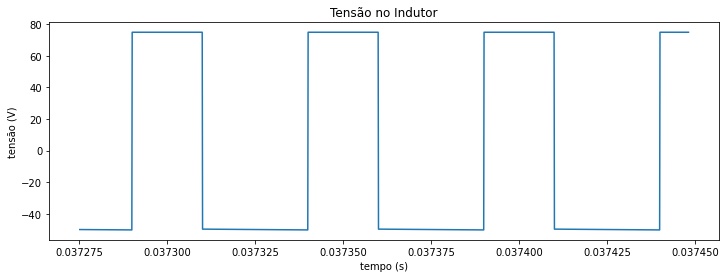

In [50]:
import numpy  as np
import matplotlib.pyplot as plt

data = np.loadtxt('dados/buck-boost/50V-40W/tensão_no_indutor.csv', delimiter=',', skiprows=1)


x = data[:, 0]
y = data[:, 1]
plt.figure(figsize=(12,4))#altera as dimensões do gráfico
plt.plot(x, y,'-')

plt.title('Tensão no Indutor')
plt.xlabel('tempo (s)')
plt.ylabel('tensão (V)')
plt.show()

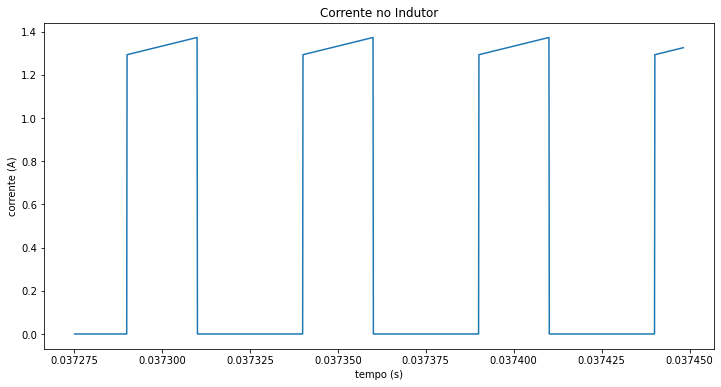

In [51]:
import numpy  as np
import matplotlib.pyplot as plt
data = np.loadtxt('dados/buck-boost/50V-40W/corrente_no_indutor.csv', delimiter=',', skiprows=1)


x = data[:, 0]
y = data[:, 1]
plt.figure(figsize=(12,6))#altera as dimensões do gráfico
plt.plot(x, y,'-')

plt.title('Corrente no Indutor')
plt.xlabel('tempo (s)')
plt.ylabel('corrente (A)')
plt.show()

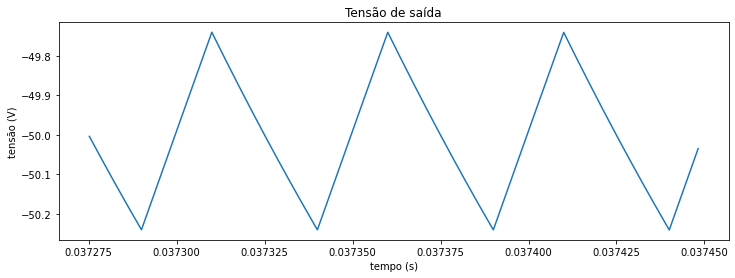

In [52]:
import numpy  as np
import matplotlib.pyplot as plt
data = np.loadtxt('dados/buck-boost/50V-40W/Vout.csv', delimiter=',', skiprows=1)


x = data[:, 0]
y = data[:, 1]
plt.figure(figsize=(12,4))#altera as dimensões do gráfico
plt.plot(x, y,'-')

plt.title('Tensão de saída')
plt.xlabel('tempo (s)')
plt.ylabel('tensão (V)')
plt.show()

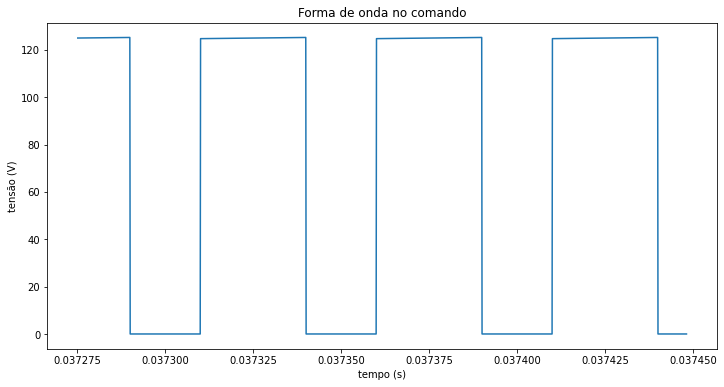

In [53]:
import numpy  as np
import matplotlib.pyplot as plt
data = np.loadtxt('dados//buck-boost/50V-40W/tensão_na_chave.csv', delimiter=',', skiprows=1)


x = data[:, 0]
y = data[:, 1]
plt.figure(figsize=(12,6))#altera as dimensões do gráfico
plt.plot(x, y,'-')

plt.title('Forma de onda no comando')
plt.xlabel('tempo (s)')
plt.ylabel('tensão (V)')
plt.show()

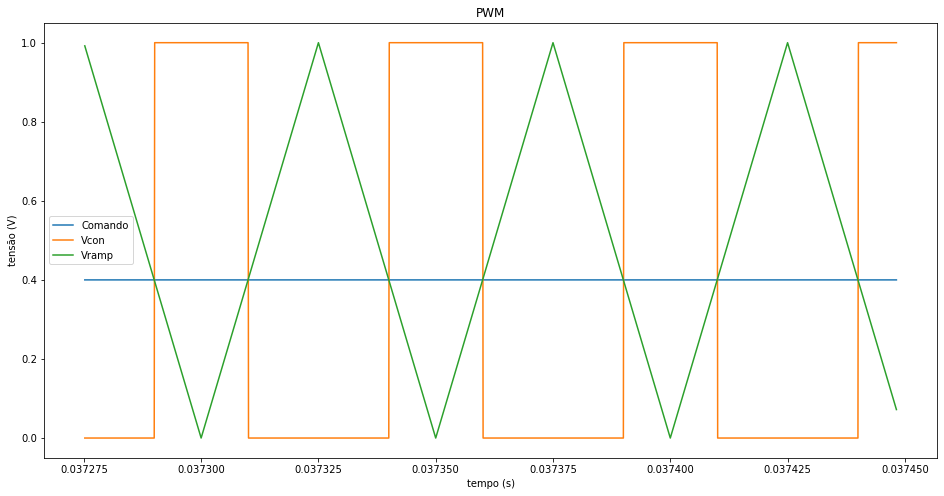

In [54]:
import numpy  as np
import matplotlib.pyplot as plt
data = np.loadtxt('dados/buck-boost/50V-40W/pwm.csv', delimiter=',', skiprows=1)


x = data[:, 0]#tempo
y = data[:, 1]#tensão sobre a chave
z = data[:, 2]#Vcon
g = data[:, 3]#Vramp
plt.figure(figsize=(16,8))#altera as dimensões do gráfico
plt.plot(x,y)
plt.plot(x,z)
plt.plot(x,g)

plt.title('PWM')
plt.xlabel('tempo (s)')
plt.ylabel('tensão (V)')
plt.legend(['Comando','Vcon','Vramp'], loc = 'best', fontsize=10)
plt.show()

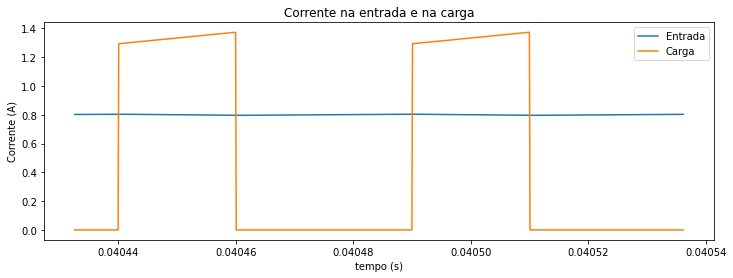

In [55]:
import numpy  as np
import matplotlib.pyplot as plt
data = np.loadtxt('dados/buck-boost/50V-40W/correntes.csv', delimiter=',', skiprows=1)

x = data[:, 0]
y = data[:, 1]
z = data[:, 2]
plt.figure(figsize=(12,4))#altera as dimensões do gráfico
plt.plot(x,y)
plt.plot(x,z)

plt.title('Corrente na entrada e na carga')
plt.xlabel('tempo (s)')
plt.ylabel('Corrente (A)')
plt.legend(['Entrada','Carga'], loc = 'best')
plt.show()

#### Segunda opção de projeto:
- Alteração da tensão de saída para 127V.
- Alteração da potência para 50W. 

In [56]:
Vin2 = 75
print("A tensão de entrada é", Vin, "V")
Vout2 = 127
print("A tensão de saída é", Vout2, "V")
Po2 = 50
print("A potência máxima de saída é", Po2, "W")
fs2 = 20000
print("A frequência de comutação é", fs, "Hz")
x = Vout2/Vin2
D2= (x/(x+1))
print("A razão ciclíca é", D2)
Io2 = Po2/Vout2
print("A corrente de saída é", "%.3f" % Io2, "A")
delta_Il2 = 0.1*Io2
print("A ondulação de corrente no indutor é", "%.3f" % delta_Il2, "A")
delta_Vc2 = 0.01*Vout2
print("A ondulação de tensão no capacitor é", "%.3f" % delta_Vc2, "V")
Ro2 = (Vout2**2)/Po2
print("A resistência de carga é", Ro2, "ohms")
Lo2 = (Vin2*D2)/(fs2*delta_Il2)
print("O indutor de saída é", "%.4f" % Lo2, "H")
Co2 = (Io2*D2)/(fs*delta_Vc2)
print("O capacitor de saída é", Co2, "F")
Il_md2 = IL = Io2+(Po2/Vin2)
print("O valor médio da corrente no indutor é", "%.3f" % Il_md2, "A")
Is_ef2 = (D2**0.5)*Io2 
print("O valor eficaz da corrente na chave é", "%.3f" % Is_ef2, "A")
Is_max2 = Io2 + delta_Il2/2 
print("O valor máximo da corrente na chave é", "%.3f" % Is_max2, "A")
Vs_max2 = Vin
print("O valor máximo da tensão na chave é", Vs_max2, "V")
Id_md2 = (1-D2)*Io2 
print("O valor médio da corrente no diodo é", "%.3f" % Id_md2, "A")
Id_ef2 = ((1-D2)**0.5)*Io2 
print("O valor eficaz da corrente no diodo é", "%.3f" % Id_ef2, "A")
Id_max2 = Io2 + delta_Il2/2 
print("O valor máximo da corrente no diodo é", "%.3f" % Id_max2, "A")
Vd_max2 = Vin2
print("O valor máximo da tensão no diodo é", Vd_max2, "V")
Rcrit2 = 2*Lo2*fs/(1-D2)**2
print("A resistência crítica é", "%.0f" % Rcrit2, "ohms")

A tensão de entrada é 75 V
A tensão de saída é 127 V
A potência máxima de saída é 50 W
A frequência de comutação é 20000 Hz
A razão ciclíca é 0.6287128712871287
A corrente de saída é 0.394 A
A ondulação de corrente no indutor é 0.039 A
A ondulação de tensão no capacitor é 1.270 V
A resistência de carga é 322.58 ohms
O indutor de saída é 0.0599 H
O capacitor de saída é 9.745068995088486e-06 F
O valor médio da corrente no indutor é 1.060 A
O valor eficaz da corrente na chave é 0.312 A
O valor máximo da corrente na chave é 0.413 A
O valor máximo da tensão na chave é 75 V
O valor médio da corrente no diodo é 0.146 A
O valor eficaz da corrente no diodo é 0.240 A
O valor máximo da corrente no diodo é 0.413 A
O valor máximo da tensão no diodo é 75 V
A resistência crítica é 17376 ohms


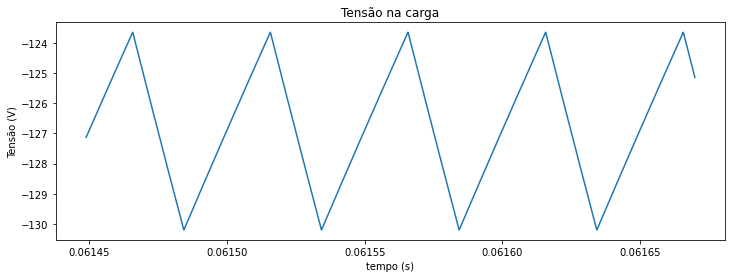

In [57]:
import numpy  as np
import matplotlib.pyplot as plt
data = np.loadtxt('dados/buck-boost/127V-50W/Tensão_de_saida.csv', delimiter=',', skiprows=1)


x = data[:, 0]
y = data[:, 1]
plt.figure(figsize=(12,4))#altera as dimensões do gráfico
plt.plot(x,y)


plt.title('Tensão na carga')
plt.xlabel('tempo (s)')
plt.ylabel('Tensão (V)')
#plt.legend(['Entrada'], loc = 'best')
plt.show()

#### Terceira opção de projeto:
- DCM: R> Rcrit.

In [2]:
Vin2 = 75
Vout2 = 127
Po2 = 50
fs2 = 20000
Io2 = Po2/Vout2
Il_md2 = IL2 = Io2+(Po2/Vin2)
delta_Il2 = (2*IL2)+0.5
D2= (Vout2*2*Io2)/(Vin2*delta_Il2)
delta_Vc2 = 0.01*Vout2
Ro2 = Po2**2/Vout2
Lo2 = (Vin2*D2)/(fs2*delta_Il2)
tx=(2*Io2)/(fs2*delta_Il2)
ta=((delta_Il2-Io2)*tx)/(delta_Il2)
Co2 = (ta*(Io2*D2))/(fs2*delta_Vc2)
print("A tensão de entrada é", Vin2, "V")

print("A tensão de saída é", Vout2, "V")

print("A potência máxima de saída é", Po2, "W")

print("A frequência de comutação é", fs2, "Hz")


print("A razão ciclíca é", D2)

print("A corrente de saída é", "%.3f" % Io2, "A")

print("A ondulação de corrente no indutor é", "%.3f" % delta_Il2, "A")

print("A ondulação de tensão no capacitor é", "%.3f" % delta_Vc2, "V")

print("A resistência de carga é", Ro2, "ohms")

print("O indutor de saída é", "%.4f" % Lo2, "H")

print("O capacitor de saída é", Co2, "F")
Il_md2 = IL = Io2+(Po2/Vin2)
print("O valor médio da corrente no indutor é", "%.3f" % Il_md2, "A")
Is_ef2 = (D2**0.5)*Io2 
print("O valor eficaz da corrente na chave é", "%.3f" % Is_ef2, "A")
Is_max2 = Io2 + delta_Il2/2 
print("O valor máximo da corrente na chave é", "%.3f" % Is_max2, "A")
Vs_max2 = Vin2
print("O valor máximo da tensão na chave é", Vs_max2, "V")
Id_md2 = (1-D2)*Io2 
print("O valor médio da corrente no diodo é", "%.3f" % Id_md2, "A")
Id_ef2 = ((1-D2)**0.5)*Io2 
print("O valor eficaz da corrente no diodo é", "%.3f" % Id_ef2, "A")
Id_max2 = Io2 + delta_Il2/2 
print("O valor máximo da corrente no diodo é", "%.3f" % Id_max2, "A")
Vd_max2 = Vin2
print("O valor máximo da tensão no diodo é", Vd_max2, "V")

A tensão de entrada é 75 V
A tensão de saída é 127 V
A potência máxima de saída é 50 W
A frequência de comutação é 20000 Hz
A razão ciclíca é 0.5087631447170756
A corrente de saída é 0.394 A
A ondulação de corrente no indutor é 2.621 A
A ondulação de tensão no capacitor é 1.270 V
A resistência de carga é 19.68503937007874 ohms
O indutor de saída é 0.0007 H
O capacitor de saída é 1.0066886615568232e-10 F
O valor médio da corrente no indutor é 1.060 A
O valor eficaz da corrente na chave é 0.281 A
O valor máximo da corrente na chave é 1.704 A
O valor máximo da tensão na chave é 75 V
O valor médio da corrente no diodo é 0.193 A
O valor eficaz da corrente no diodo é 0.276 A
O valor máximo da corrente no diodo é 1.704 A
O valor máximo da tensão no diodo é 75 V


In [3]:
import numpy  as np
import matplotlib.pyplot as plt
data = np.loadtxt('dados/buck-boost/127V-50W/DCM/', delimiter=',', skiprows=1)


x = data[:, 0]
y = data[:, 1]
plt.figure(figsize=(12,4))#altera as dimensões do gráfico
plt.plot(x,y)


plt.title('corrente no indutor')
plt.xlabel('tempo (s)')
plt.ylabel('Corrente (A)')
#plt.legend(['Entrada'], loc = 'best')
plt.show()

PermissionError: [Errno 13] Permission denied: 'dados/buck-boost/127V-50W/DCM/'

#### Quarta opção de projeto:
- Mudança de frequência - Projeto 1

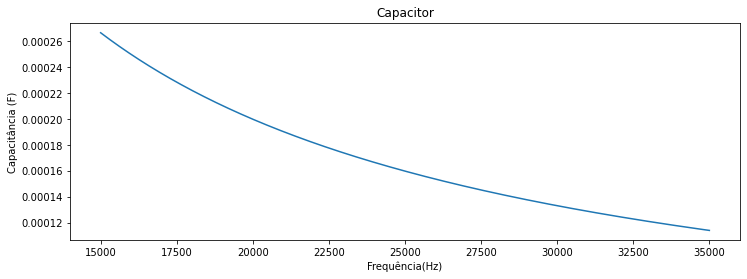

In [67]:
import numpy  as np
import matplotlib.pyplot as plt


f = np.arange(15000,60000,1)
Co_f = (Io*D)/(delta_Il)*(1/f)
plt.figure(figsize=(12,4))#altera as dimensões do gráfico
plt.plot(f, Co_f,'-')

plt.title('Capacitor')
plt.xlabel('Frequência(Hz)')
plt.ylabel('Capacitância (F)')
plt.show()

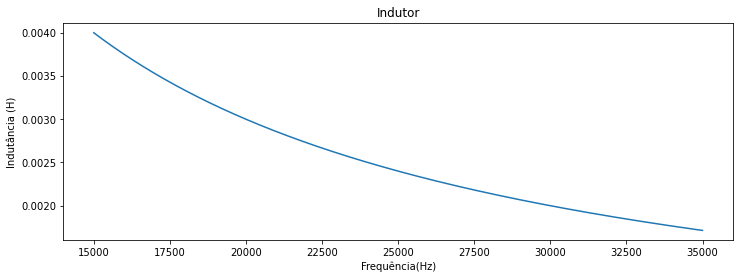

In [70]:
import numpy  as np
import matplotlib.pyplot as plt


f = np.arange(15000,60000,1)
Co_f = (Vin*D)/(f*delta_Vc)#*(1/f)
plt.figure(figsize=(12,4))#altera as dimensões do gráfico
plt.plot(f, Co_f,'-')

plt.title('Indutor')
plt.xlabel('Frequência(Hz)')
plt.ylabel('Indutância (H)')
plt.show()

#### Quinta opção de projeto:
- Mudança de frequência - Projeto 2 - (127V - 50W)

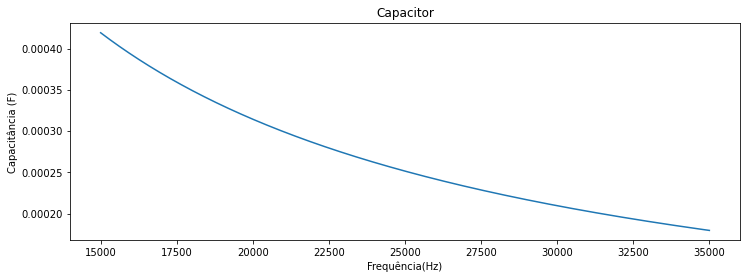

In [73]:
import numpy  as np
import matplotlib.pyplot as plt


f = np.arange(15000,60000,1)
Co_f2 = (Io2*D2)/(delta_Il2)*(1/f)
plt.figure(figsize=(12,4))#altera as dimensões do gráfico
plt.plot(f, Co_f,'-')

plt.title('Capacitor')
plt.xlabel('Frequência(Hz)')
plt.ylabel('Capacitância (F)')
plt.show()

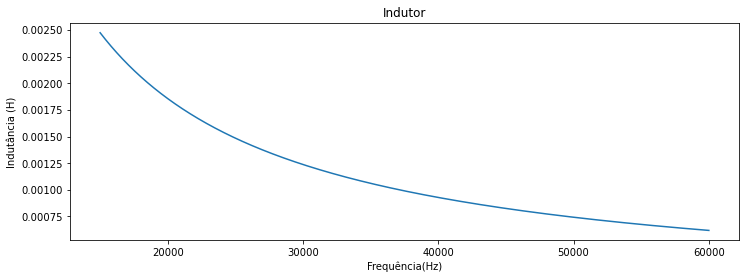

In [77]:
import numpy  as np
import matplotlib.pyplot as plt


f = np.arange(15000,60000,1)
Lo_f2 = (Vin2*D2)/(f*delta_Vc2)#*(1/f)
plt.figure(figsize=(12,4))#altera as dimensões do gráfico
plt.plot(f, Lo_f2,'-')

plt.title('Indutor')
plt.xlabel('Frequência(Hz)')
plt.ylabel('Indutância (H)')
plt.show()

#### Quinta opção de projeto:
- Variação da frequência - fs = 5 KHz e fs= 50 KHz

##### fs = 5 KHz:

In [ ]:
Vin = 75
print("A tensão de entrada é", Vin, "V")
Vout = 30
print("A tensão de saída é", Vout, "V")
Po = 20
print("A potência máxima de saída é", Po, "W")
fs1 = 5000
print("A frequência de comutação é", fs1, "Hz")
D = Vout/Vin
print("A razão ciclíca é", D)
Io = Po/Vout
print("A corrente de saída é", "%.3f" % Io, "A")
delta_Il = 0.1*Io
print("A ondulação de corrente no indutor é",  "%.3f" % delta_Il, "A")
delta_Vc = 0.01*Vout
print("A ondulação de tensão no capacitor é", "%.3f" % delta_Vc, "V")
Ro = (Vout**2)/Po
print("A resistência de carga é", "%.3f" % Ro, "ohms")
Lo5 = (Vin-Vout)*D/(fs1*delta_Il)
print("O indutor de saída é", "%.4f" % Lo5, "H")
Co5 = delta_Il/(8*fs1*delta_Vc)
print("O capacitor de saída é", Co5, "F")
Is_md = D*Io
print("O valor médio da corrente na chave é", "%.3f" % Is_md, "A")
Is_ef = (D**0.5)*Io 
print("O valor eficaz da corrente na chave é", "%.3f" % Is_ef, "A")
Is_max = Io + delta_Il/2 
print("O valor máximo da corrente na chave é", "%.3f" % Is_max, "A")
Vs_max = Vin
print("O valor máximo da tensão na chave é", Vs_max, "V")
Id_md = (1-D)*Io
print("O valor médio da corrente no diodo é", "%.3f" % Id_md, "A")
Id_ef = ((1-D)**0.5)*Io
print("O valor eficaz da corrente no diodo é", "%.3f" % Id_ef, "A")
Id_max = Io + delta_Il/2 
print("O valor máximo da corrente no diodo é", "%.3f" % Id_max, "A")
Vd_max = Vin
print("O valor máximo da tensão no diodo é", Vd_max, "V")
Rcrit5 = 2*Lo5*fs1/(1-D)
print("A resistência crítica é", "%.0f" % Rcrit5, "ohms")

##### fs = 50 KHz:

In [ ]:
Vin = 75
print("A tensão de entrada é", Vin, "V")
Vout = 30
print("A tensão de saída é", Vout, "V")
Po = 20
print("A potência máxima de saída é", Po, "W")
fs2 = 50000
print("A frequência de comutação é", fs2, "Hz")
D = Vout/Vin
print("A razão ciclíca é", D)
Io = Po/Vout
print("A corrente de saída é", "%.3f" % Io, "A")
delta_Il = 0.1*Io
print("A ondulação de corrente no indutor é",  "%.3f" % delta_Il, "A")
delta_Vc = 0.01*Vout
print("A ondulação de tensão no capacitor é", "%.3f" % delta_Vc, "V")
Ro = (Vout**2)/Po
print("A resistência de carga é", "%.3f" % Ro, "ohms")
Lo6 = (Vin-Vout)*D/(fs2*delta_Il)
print("O indutor de saída é", "%.4f" % Lo6, "H")
Co6 = delta_Il/(8*fs2*delta_Vc)
print("O capacitor de saída é", Co6, "F")
Is_md = D*Io
print("O valor médio da corrente na chave é", "%.3f" % Is_md, "A")
Is_ef = (D**0.5)*Io 
print("O valor eficaz da corrente na chave é", "%.3f" % Is_ef, "A")
Is_max = Io + delta_Il/2 
print("O valor máximo da corrente na chave é", "%.3f" % Is_max, "A")
Vs_max = Vin
print("O valor máximo da tensão na chave é", Vs_max, "V")
Id_md = (1-D)*Io
print("O valor médio da corrente no diodo é", "%.3f" % Id_md, "A")
Id_ef = ((1-D)**0.5)*Io
print("O valor eficaz da corrente no diodo é", "%.3f" % Id_ef, "A")
Id_max = Io + delta_Il/2 
print("O valor máximo da corrente no diodo é", "%.3f" % Id_max, "A")
Vd_max = Vin
print("O valor máximo da tensão no diodo é", Vd_max, "V")
Rcrit6 = 2*Lo6*fs2/(1-D)
print("A resistência crítica é", "%.0f" % Rcrit6, "ohms")

Ao se alterar a frequência do conversor buck, há mudanças nos valores de indutor e capacitor apenas, visto que os valores desses dois componentes dependem inversamente da frequência. (Considerando os outros valores difinidos inicialmente - Vout, Vin, D, P)

### Projeto do Indutor:

- Selecionar o núcleo magnético mais adequado;
- Calcular o número de espiras;
- Calcular tamanho do entreferro;
- Escolher o condutor;
- Verificar a possibilidade da execução do projeto.

#### Selecionar o núcleo magnético adequado

##### Ferrita:

In [ ]:
B_max = 0.3
print("O valor da densidade de fluxo magnético máximo é", B_max, "T")
Kw = 0.6
print("O valor do fator de utilização da área de enrolamento é", Kw)
J = 450
print("O valor da densidade de corrente no condutor é", J, "A/cm^2")

In [ ]:
Il_max = 0.699
Il_min = 0.632
Il_rms = 0.666
print("O valor máximo da corrente no indutor é", Il_max, "A")
print("O valor mínimo da corrente no indutor é", Il_min, "A")
print("O valor RMS da corrente no indutor é", Il_rms, "A")

$$AeAw = {LoI_{lmax}I_{lrms}10^4 \over B_{max}K_{w}J}$$

In [ ]:
A_eA_w = Lo*Il_max*Il_rms*10**4/(B_max*Kw*J)
print("A multiplicação entre a área efetiva e a área da janela do núcleo é", A_eA_w,"cm^4")

###### Tabela: Núcleos Magnéticos de ferrite com geométrica EE
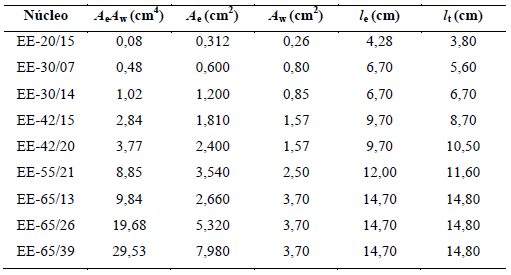

In [ ]:
A_eA_w = 1.02
A_e = 1.2
A_w = 0.85
le = 6.7 
lt = 6.7
print("A multiplicação entre a área efetiva e a área da janela do núcleo será", A_eA_w,"cm^4 - valor mais próximo do valor calculado")
print("A área efetiva será", A_e,"cm^2 - valor escolhido pela tabela")
print("A área da janela do núcleo será", A_w,"cm^2 - valor escolhido pela tabela")
print("O comprimento do caminho magnético será", le,"cm - valor escolhido pela tabela")
print("O comprimento médio de uma espira será", lt,"cm - valor escolhido pela tabela")

#### Número de espiras

$$N = {LoI_{lmax}10^4 \over B_{max}A_{e}}$$

In [ ]:
N = Lo*Il_max*10**4/(B_max*A_e)
N = int(N)
print("O número de espiras é", N)

#### Tamanho do entreferro

$$l_{g} = {N2u_{o}A_{e} \over Lo10^4}$$

In [ ]:
uo = 4*3.1415926535897931*10**(-7)
lg = N**2*uo*A_e/(Lo*10**4)
print("O tamanho do entreferro é", "%.3f" % (lg*10**3), "mm")

#### Dimensionamento dos condutores

$$I_{tot} = 1.1Nl_{t}$$

$$S_{fio} = {I_{lrms} \over J}$$

In [ ]:
ltot = 1.1*N*lt
print("O comprimento total do condutor é", "%.3f" % ltot, "m")
Sfio = Il_rms/J
print("O valor mínimo da bitola é", "%.3f" % (Sfio*10**2), "mm^2")

###### Tabela: Condutores de cobre:
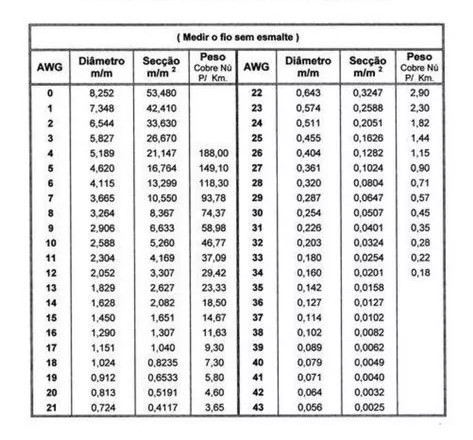

In [ ]:
Sfio = 0.1626
print("O valor da bitola escolhido pela tabela acima foi", Sfio, "mm^2 - AWG=25")

$$A_{w min} = {n_{cond}S_{fio}10^{-2}N \over K_{w}}$$

In [ ]:
ncond = 1
A_w_min = ncond*Sfio*10**(-2)*N/Kw
print("A valor mínimo da área da janela do núcleo será", A_w_min,"cm^2")

<font color='green'>Como Aw_min é menor que Aw a execução do projeto é possível!!!</font>

### Projeto do Dissipador de Calor:

Para o caso sem dissipador, o calor circula da junção para o ambiente através do encapsulamento. Assim, o circuito térmico se resume apenas à resistência Rjc (junção-case) em série com Rca (case-ambiente), sendo estes parâmetros encontrados no datasheet do componenete. 

Para saber se o componente irá precisar de do dissipador de calor é estimado a temperatura de junção para a aplicação em específico. 

$$T_{j} = R_{ja}P_{T} + T_{a}$$

##### MOSFET (BSC100N10NSF):

In [ ]:
P_T = 42.49*10**(-3)
R_ja = 62
Ta = 50
T_j_1 = R_ja*P_T + Ta
print("A temperatura de junção estimada é", "%.3f" % T_j_1, "°C")

<font color='green'>Como 52.63438°C é menor que 150°C (máxima temperatura de operação do transistor), o componente não precisa de um dissipador!!!</font>

##### DIODO (MBR20100CT):

In [ ]:
P_T2 = 185.55*10**(-3)
R_ja2 = 60
Ta2 = 50
T_j_2 = R_ja2*P_T2 + Ta2
print("A temperatura de junção estimada é", T_j_2, "°C")

<font color='green'>Como 61.133°C é menor que 175°C (máxima temperatura de operação do diodo), o componente não precisa de um dissipador!!!</font>